In [2]:
from IPython.display import display
import arcgis
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import FeatureLayer
from arcgis.mapping import WebMap

In [3]:
gis = GIS("https://datascienceqa.esri.com/portal", "portaladmin", "esri.agp", verify_cert=False)

#### Geocoded Provider Data

Let's get the geocoded data stored as a feature layer

In [263]:
# search_result = gis.content.search('title: medical_provider_data_geocoded_locations', 'Feature Layer')
# search_result = gis.content.search('title: npi_WY_GeocodeAddresses', 'Feature Layer')
# search_result = gis.content.search('title: provider_clean_data_singleline_geocoded_locations', 'Feature Layer')
# search_result = gis.content.search('title: Geocoded_Results_for_npi_WY_fields_npi_WY_fieldsAHHH', 'Feature Layer')
search_result = gis.content.search('title: provider_clean_data_geocoded_6_19', 'Feature Layer')

In [136]:
provider_data_item = search_result[0]
provider_data_item

<Item title:"provider_clean_data_geocoded_6_19" type:Feature Layer Collection owner:portaladmin>

In [137]:
provider_data_item.layers

[<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer/0">]

In [138]:
provider_data_layer = provider_data_item.layers[0]
provider_data_layer

<FeatureLayer url:"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer/0">

In [99]:
# Look at the fields and their data types
for f in provider_data_layer.properties.fields:
    print(f['name'],'      ',f['type'])

user_npi        esriFieldTypeDouble
user_entity_type        esriFieldTypeString
user_organization_name        esriFieldTypeString
user_Address        esriFieldTypeString
user_Address2        esriFieldTypeString
user_City        esriFieldTypeString
user_Region        esriFieldTypeString
user_Postal        esriFieldTypeString
user_CountryCode        esriFieldTypeString
user_provider_gender        esriFieldTypeString
user_taxonomy_code_1        esriFieldTypeString
user_taxonomy_code_2        esriFieldTypeString
user_taxonomy_code_3        esriFieldTypeString
user_taxonomy_code_4        esriFieldTypeString
user_taxonomy_code_5        esriFieldTypeString
user_taxonomy_code_6        esriFieldTypeString
user_taxonomy_code_7        esriFieldTypeString
user_taxonomy_code_8        esriFieldTypeString
user_taxonomy_code_9        esriFieldTypeString
user_taxonomy_code_10        esriFieldTypeString
user_taxonomy_code_11        esriFieldTypeString
user_taxonomy_code_12        esriFieldTypeString
use

### Check Geocoding

Let's do a random test to check geocoded data. For a given state, we will look at and plot the data points based on address provided vs address geocoded.

#### Check Wyoming

In [153]:
# Create a spatially enabled dataframe for WY
# %time wy_df = provider_data_layer.query(where="user_state='WY'", as_df=True)
%time wy_df = provider_data_layer.query(where="user_Region='WY'", as_df=True)
wy_df.shape

Wall time: 5.24 s


(12770, 93)

In [154]:
# Look at data points that are geocoded outside of Wyoming
len(wy_df[wy_df['Region']!='Wyoming'])

3

In [210]:
# Check the accuracy of geocoding
round(100-((wy_df.shape[1]/wy_df.shape[0])*100),2)

99.27

In [155]:
map1 = gis.map('USA')
map1

MapView(layout=Layout(height='400px', width='100%'))

In [156]:
wy_df.spatial.plot(map1)

True

In [84]:
map1.remove_layers()

True

We have an accuracy of >99% with geocoding. From this map, we can see that out of 12770 points that have been geocoded only 3 are outside of WY. Similar analysis can be performed for other states to check for geocoding errors.

#### Create df for Arizona

In [127]:
%time az_df = provider_data_layer.query(where="user_Region='AZ'", as_df=True)
az_df.shape

Wall time: 55.5 s


(108769, 93)

In [128]:
len(az_df[az_df['Region']!='Arizona'])

20

#### Create df for Texas

In [129]:
%time tx_df = provider_data_layer.query(where="user_Region='TX'", as_df=True)
tx_df.shape

Wall time: 4min


(365783, 93)

In [130]:
len(tx_df[tx_df['Region']!='Texas'])

17

In [ ]:
az_df.columns

In [ ]:
new2_az_df = az_df[['OBJECTID', 'X','Y', 'SHAPE',
       'user_addressline1', 'user_addressline2', 'user_city', 'user_country',
       'user_entity_type', 'user_full_address', 'user_npi',
       'user_organization_name', 'user_postal_code']]

In [ ]:
new_az_df = az_df[['AddNumFrom', 'AddNumTo', 'Addr_type', 'AddressNumber', 'AddressRange',
       'BldgName', 'BldgType', 'Block', 'BuildingName', 'City', 'Country',
       'DisplayX', 'DisplayY', 'Distance', 'District', 'ExtraInfo', 'LangCode',
       'LevelName', 'LevelType', 'Loc_name', 'LongLabel', 'Match_addr',
       'MetroArea', 'Neighborhood', 'OBJECTID', 'Phone', 'PlaceName',
       'Place_addr', 'Postal', 'PostalExt', 'Rank', 'Region', 'RegionAbbr',
       'SHAPE', 'Score', 'Sector', 'ShortLabel', 'Side', 'StAddr', 'StDir',
       'StName', 'StPreDir', 'StPreType', 'StType', 'Status', 'SubAddress',
       'Subregion', 'Territory', 'Type', 'URL', 'UnitName', 'UnitType', 'X',
       'X_max', 'X_min', 'Y', 'Y_max', 'Y_min', 'Zone', 'globalid', 'in_city',
       'user_addressline1', 'user_addressline2', 'user_city', 'user_country',
       'user_entity_type', 'user_full_address', 'user_npi',
       'user_organization_name', 'user_postal_code']]

In [ ]:
new2_az_df.shape

### Rendering through Feature Layer

Complete layer for provider data would not render due to large number data points. We will pick specific regions for further exploration. Let's look at ID, WY, NV, UT

In [249]:
map2 = gis.map('USA')
map2

MapView(layout=Layout(height='400px', width='100%'))

In [250]:
map2.add_layer({"type":"FeatureLayer", 
               "url":"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer", 
               "definition_expression" : "Region='Wyoming' or Region='Idaho' or Region='Utah' or Region='Nevada'",
#                "renderer":"HeatmapRenderer",
#                "field_name":"user_npi",
               "opacity":0.7,
                "radius":5
              })

In [251]:
map2.remove_layers()

True


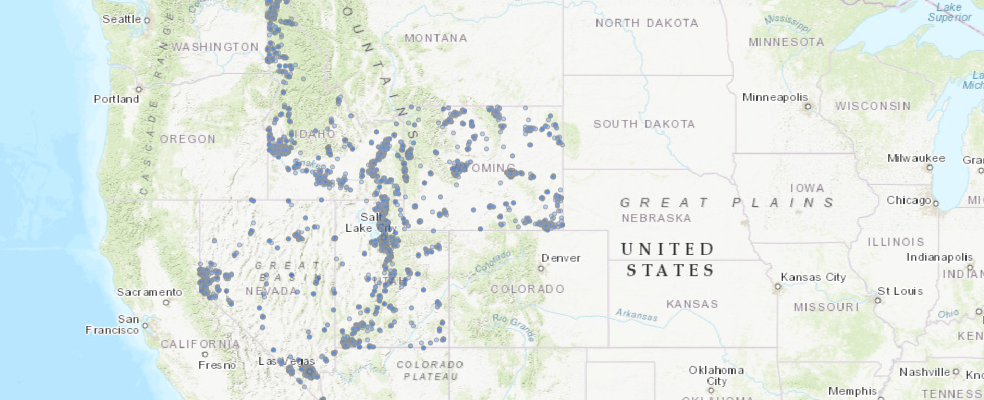

In [147]:
map2.take_screenshot()

South - Let's look at OK, AR, AL, MS, IO, TX

In [252]:
map3 = gis.map('USA')
map3

MapView(layout=Layout(height='400px', width='100%'))

In [255]:
f_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer")
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
#             "minScale":100,
#             "maxScale":10,
            "blurRadius":2,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map3.add_layer(f_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                "definition_expression" : "Region='Wyoming' or Region='Idaho' or Region='Utah' or Region='Nevada'"
#                  "field_name":"user_npi"
               })

In [265]:
map3.remove_layers()

True

MapView(layout=Layout(height='400px', width='100%'))


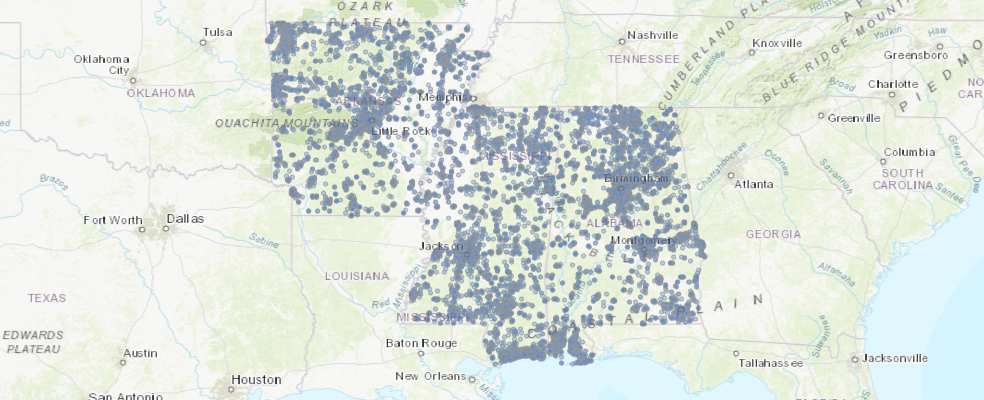

In [149]:
map_south = gis.map('USA')
map_south

In [150]:
map_south.add_layer({"type":"FeatureLayer", 
               "url":"https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer", 
               "definition_expression" : "Region='Arkansas' or Region='Mississippi' or Region='Alabama'",
#                "renderer":"HeatmapRenderer",
#                "field_name":"user_npi",
               "opacity":0.7,
                "radius":5
              })

In [176]:
map_south.remove_layers()

True


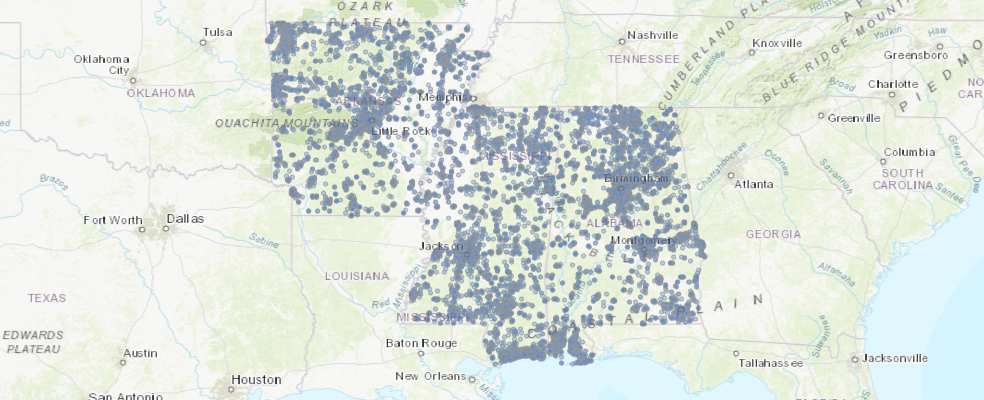

In [151]:
map_south.take_screenshot()

In [238]:
map_usa = gis.map('USA')
map_usa

MapView(layout=Layout(height='400px', width='100%'))

In [244]:
f_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer")
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
#             "minScale":100,
#             "maxScale":10,
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map_usa.add_layer(f_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                })

In [245]:
map_usa.remove_layers()

True


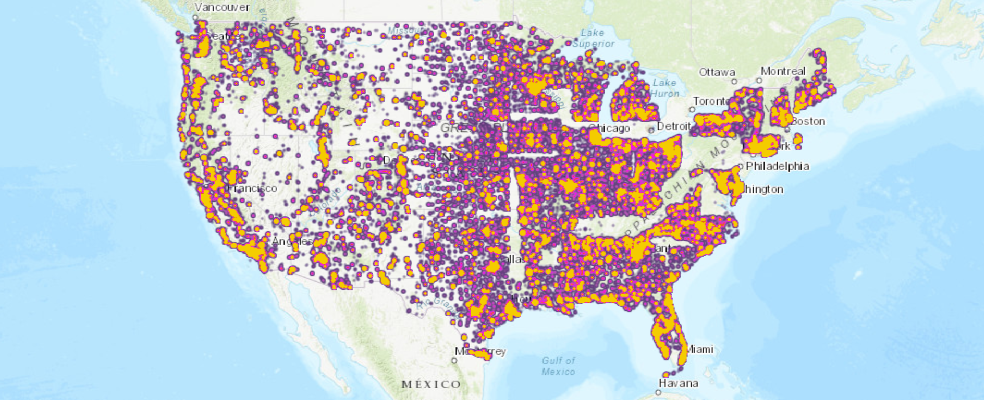

In [204]:
map_usa.take_screenshot()

### Mental Health

In [239]:
mental_health = ['2084P0800X','207R00000X']

In [242]:
f_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer")
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
#             "minScale":100,
#             "maxScale":10,
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map_usa.add_layer(f_layer,
               { "type": "FeatureLayer",
                 "renderer": renderer,
                "definition_expression" : "Region='Tennessee' and (user_taxonomy_code_1 in ['2084P0800X','207R00000X'])",
#                 "definition_expression" : "Region='Tennessee' and (user_taxonomy_code_1='2084P0800X' or user_taxonomy_code_1='207R00000X')",
#                 "definition_expression" : "user_taxonomy_code_1='2084P0800X'"
#                 "definition_expression" : "Region='Wyoming' or Region='Idaho' or Region='Utah' or Region='Nevada'"
#                  "field_name":"user_npi"
               })

In [42]:
layer = {"type":"FeatureLayer", 
               "url":"https://datascienceqa.esri.com/server/rest/services/Hosted/npi_TX_GeocodeAddresses/FeatureServer"}
renderer = {"renderer": "autocast", # Tells the JS API to autocast this object
            "type":"esri.renderers.HeatmapRenderer",
                "maxPixelIntensity":2,
                "minPixelIntensity":0,
                "colorStops": [
            { "color": "rgba(63, 40, 102, 0)", "ratio": 0 },
            { "color": "#7b3ce9", "ratio": 0.581 },
            { "color": "#ffff00", "ratio": 1 }
              ]
              }

map3.add_layer(layer, renderer)

In [ ]:
map3.extent = {'spatialReference': {'latestWkid': 3857, 'wkid': 102100},
 'xmin': -12261129.128282841,
 'ymin': 3228627.319645519,
 'xmax': -9854279.98163985,
 'ymax': 4207021.281695515}

In [ ]:
webmap_item_properties = {'title':'Texas Healthcare Providers',
                         'snippet':'Map created using Python API showing healthcare providers in TX',
                         'tags':['automation', 'providers', 'healthcare', 'python']}

map3.save(webmap_item_properties)

In [ ]:
az_df.shape

### Using Web Maps

### Provider and Population Density for TX

<Item title:"TX_Provider_PopDens" type:Web Map owner:portaladmin>
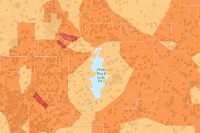

In [10]:
# Get the Provider and Population density item
search_results = gis.content.search('title: TX_Provider_PopDens', 'Web Map')

# Access the first Item that's returned
tx_provider_item = search_results[0]

tx_provider_item

In [4]:
# Create Webmap
from arcgis.widgets import MapView
tx_provider_map = MapView(item=tx_provider_item, gis=gis)
tx_provider_map.legend=True
tx_provider_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)

We can see that these counties below San Antonio have 

In [12]:
for layer in tx_provider_map.layers:
    print(layer.title)
# tx_provider_map.remove_layer(tx_provider_map.layers[1])

npi_TX_GeocodeAddresses - copy
npi_TX_GeocodeAddresses
2018 USA Population Density


### Calling different layers to create webmap

In [246]:
map4 = gis.map('USA')
map4

MapView(layout=Layout(height='400px', width='100%'))

In [248]:
pop_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")
map4.add_layer(pop_layer,
               { "type": "MapImageLayer"})
map4.add_layer(s)
map4.add_layer(w)

NameError: name 's' is not defined

In [55]:
map4.remove_layers()

True

### Provider density and Median Income for Texas

<Item title:"TX_Provider_MedianIncome" type:Web Map owner:portaladmin>
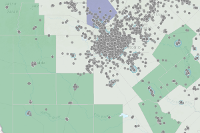

In [11]:
# Get the Provider density and Median Income webmap item
tx_med_income = gis.content.search('title: TX_Provider_MedianIncome',
                                    'Web Map')

# Access the first Item that's returned
tx_med_income_item = tx_med_income[0]

tx_med_income_item

In [61]:
# Display Webmap
tx_income_map = WebMap(tx_med_income_item)
tx_income_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [12]:
from arcgis.widgets import MapView
tx_income_map = MapView(item=tx_med_income_item, gis=gis)
tx_income_map.legend = True
tx_income_map

MapView(layout=Layout(height='400px', width='100%'), legend=True)


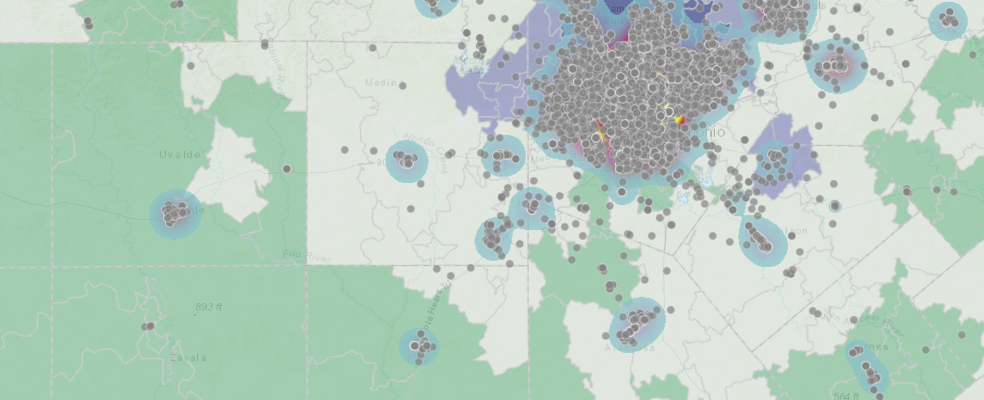

In [28]:
mv.take_screenshot()

In [27]:
for layer in tx_provider_map.layers:
    print(layer.title)

npi_TX_GeocodeAddresses - copy


In [41]:
map4 = gis.map('USA')
map4

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
f1_layer = FeatureLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")

In [38]:
map4.add_layer(f1_layer,
               { "type": "FeatureLayer"})

In [49]:
map4.remove_layers()

True

In [28]:
map5 = gis.map('USA')
map5

MapView(layout=Layout(height='400px', width='100%'))

In [29]:
from arcgis.mapping import MapImageLayer
mil = MapImageLayer("https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer")
mil

<MapImageLayer url:"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer">

In [30]:
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POPDENS_CY",
                 "transparency":20,
                 "minValue":-9007199254740991}

renderer["classBreakInfos"] = [
	{
		"classMaxValue": 1000,
		"symbol": {
			"color": [
				255,
				255,
				178,
				255
			],
			"style": "esriSFSSolid",
			"type": "esriSFS",
			"outline": {
				"color": [
					222,
					192,
					177,
					255
				],
				"width": 1,
				"style": "esriSLSSolid",
				"type": "esriSLS"
			}
		},
		"description": "",
		"label": "0 - 1,000 people per sq mi"
	},
	{
		"classMaxValue": 4000,
		"symbol": {
			"color": [
				254,
				198,
				119,
				255
			],
			"style": "esriSFSSolid",
			"type": "esriSFS",
			"outline": {
				"color": [
					222,
					192,
					177,
					255
				],
				"width": 1,
				"style": "esriSLSSolid",
				"type": "esriSLS"
			}
		},
		"description": "",
		"label": "1,000 - 4,000 people per sq mi"
	},
	{
		"classMaxValue": 22000,
		"symbol": {
			"color": [
				253,
				141,
				60,
				255
			],
			"style": "esriSFSSolid",
			"type": "esriSFS",
			"outline": {
				"color": [
					222,
					192,
					177,
					255
				],
				"width": 1,
				"style": "esriSLSSolid",
				"type": "esriSLS"
			}
		},
		"description": "",
		"label": "4,000 - 22,000 people per sq mi"
	},
	{
		"classMaxValue": 116000,
		"symbol": {
			"color": [
				221,
				71,
				49,
				255
			],
			"style": "esriSFSSolid",
			"type": "esriSFS",
			"outline": {
				"color": [
					222,
					192,
					177,
					255
				],
				"width": 1,
				"style": "esriSLSSolid",
				"type": "esriSLS"
			}
		},
		"description": "",
		"label": "22,000 - 116,000 people per sq mi"
	},
	{
		"classMaxValue": 618125,
		"symbol": {
			"color": [
				189,
				0,
				38,
				255
			],
			"style": "esriSFSSolid",
			"type": "esriSFS",
			"outline": {
				"color": [
					222,
					192,
					177,
					255
				],
				"width": 1,
				"style": "esriSLSSolid",
				"type": "esriSLS"
			}
		},
		"description": "",
		"label": "116,000 - 618,125 people per sq mi"
	}
]

In [33]:
for layer in mil.layers:
#     if "43" in layer.url or "44" in layer.url:
    if layer.properties['id'] in [43,44,45,46,47,48,49]:
        map5.add_layer(layer, {  "type": "FeatureLayer",
                                 "renderer":renderer,
                                 "field_name":"POPDENS_CY"})
        print(layer.url)
#         print(layer.properties["drawingInfo"])
#         map5.remove_layers(layer)

https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/43
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/44
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/45
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/46
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/47
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer/48
https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/se

In [22]:
f_layer = FeatureLayer("https://datascienceqa.esri.com/server/rest/services/Hosted/provider_clean_data_geocoded_6_19/FeatureServer")
renderer = {"renderer": "autocast", #This tells python to use JS autocasting
            "type": "heatmap",
#             "minScale":100,
#             "maxScale":10,
            "blurRadius":1,  # changes the size of the clusters
            "maxPixelIntensity":2,
            "minPixelIntensity":0,
            "field":None}
renderer["colorStops"] = [{"ratio":0,"color":[63, 40, 102, 0]},
                          {"ratio":0.25,"color":[167,97,170,179]},
                          {"ratio":0.50,"color":"#7b3ce9"},
                          {"ratio":0.75,"color":[222,102,0,179]},
                          {"ratio":1,"color":[244,204,0,179]}]
#                           {"ratio":1,"color":"#ffff00"}]
map5.add_layer(f_layer,
               { "type": "FeatureLayer",
#                  "renderer": renderer,
#                 "definition_expression" : "Region='Tennessee' and (user_taxonomy_code_1 in ['2084P0800X','207R00000X'])",
#                 "definition_expression" : "Region='Tennessee' and (user_taxonomy_code_1='2084P0800X' or user_taxonomy_code_1='207R00000X')",
#                 "definition_expression" : "user_taxonomy_code_1='2084P0800X'"
                "definition_expression" : "Region='Wyoming' or Region='Idaho' or Region='Utah' or Region='Nevada'"
#                  "field_name":"user_npi"
               })

In [32]:
map5.remove_layers()

True

In [52]:
# Get the Provider density and Median Income webmap item
med_income = gis.content.search('title: 2018 USA Median Household Income',
                                    'Map Image Layer')

# Access the first Item that's returned
med_income_item = med_income[0]

med_income_item

IndexError: list index out of range

In [50]:
map4.add_layer({"type":"MapImageLayer", 
               "url":"https://datascienceqa.esri.com/portal/sharing/servers/ab4e1996d588405d9cd68348ef660f70/rest/services/USA_Demographics_and_Boundaries_2018/MapServer"})

In [55]:
item = gis.content.search("title: 2018 USA Population Density", item_type="Feature Layer")
item

[]

In [56]:
item.layers

AttributeError: 'list' object has no attribute 'layers'

In [25]:
arcgis.__version__

'1.6.1'

In [40]:
flayer_search_result = gis.content.search("owner:esri","Feature Layer", outside_org=True)
flayer_search_result

[]